# Pump it Up: Data Mining the Water Table

Recently, I discovered [drivendata.org](https://www.drivendata.org/), a site that crowdsources the world's biggest social challenges through online competitions.  Data scientists or anyone interested can participate.  One of the open competitions that piqued my interest is [*Pump it Up: Data Mining the Water Table*](https://www.drivendata.org/competitions/7/page/23/).  Using data from [Taarifa](http://taarifa.org/) and the [Tanzanian Ministry of Water](http://maji.go.tz/), I will predict the operating condition of water pumps in Tanzania.  This should help improve maintenance operations and ensure that clean, potable water is available to communities in the country.  

## Problem description

My goal is to predict the operating condition of a water pump for each record in the dataset.  The water pumps are either:

* Functional
* In need of repairs
* Or don't work at all.  

## Explore the data

You can download the data on the challenge's [data](https://www.drivendata.org/competitions/7/data/) link.  There are 4 files available:

* Training set values - The independent variables for the training set
* Training set labels - The dependent variables for each row in the training set values
* Test set values - The independent variables that need predictions
* Submission format - The format for submitting predictions

### Sample of the submissions file

In [1]:
import pandas as pd 
pd.options.display.max_columns = 200

# Raw data directory
data_raw = "../data/raw/"

# read sample submissions file
sample_submissions = pd.read_csv(data_raw + "SubmissionFormat.csv")
print(sample_submissions.head())

      id     status_group
0  50785  predicted label
1  51630  predicted label
2  17168  predicted label
3  45559  predicted label
4  49871  predicted label


### Sample of training set values

In [2]:
# read training set
train_values = pd.read_csv(data_raw + "train.csv")
print("Training set contains {} rows and {} columns \n".format(train_values.shape[0], train_values.shape[1]))
train_values.head()

Training set contains 59400 rows and 40 columns 



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### Sample of the training set labels

In [3]:
# read labels
target = pd.read_csv(data_raw + "train_labels.csv")
print("Target set contains {} rows and {} columns \n".format(target.shape[0], target.shape[1]))
target.head()

Target set contains 59400 rows and 2 columns 



,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


### Sample of test set

In [4]:
# read test set
test = pd.read_csv(data_raw + "test.csv")
print("Test set contains {} rows and {} columns \n".format(test.shape[0], test.shape[1]))
test.head()

Test set contains 14850 rows and 40 columns 



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


### List of features

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

After scanning this list, I noticed that a few features have the same descriptions.  So we have to dive deeper to see if we could potentially remove unnecessary columns.

In [66]:
# merge independent variables from train and test sets
frames = [train_values, test]
data = pd.concat(frames)
print("Merged data set contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

Merged data set contains 74250 rows and 40 columns


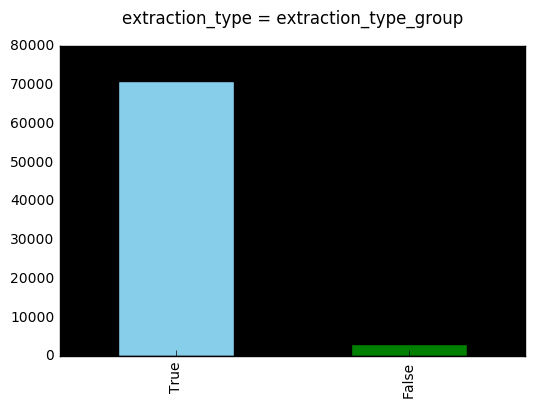

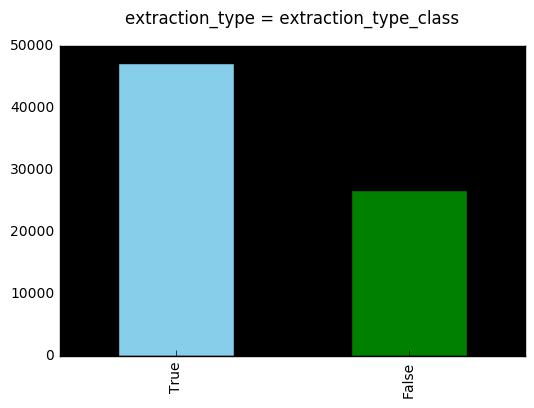

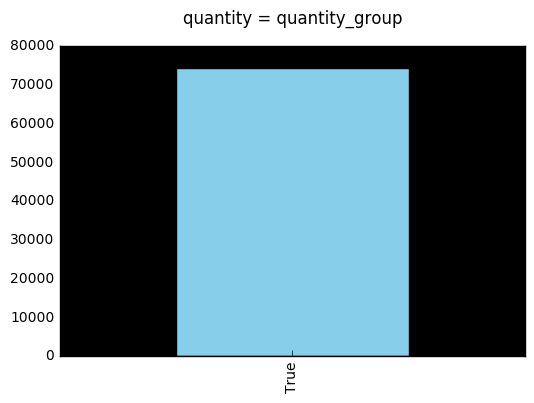

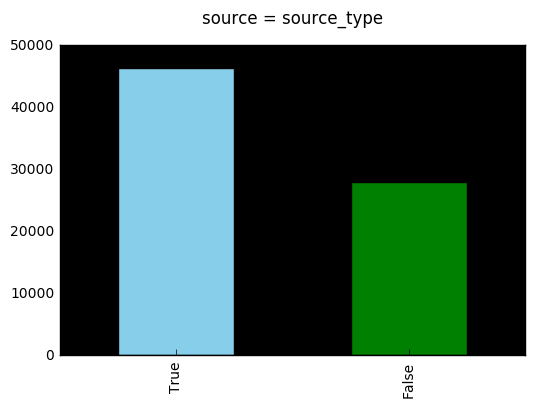

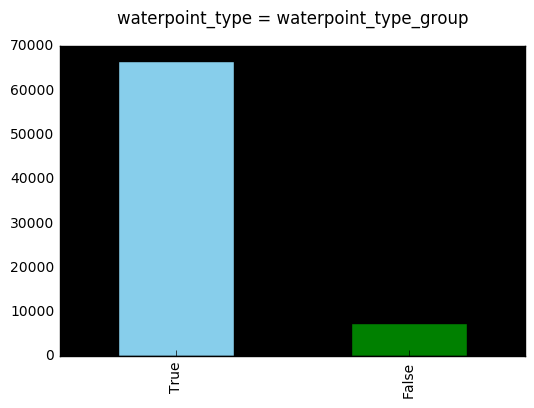

In [90]:
import matplotlib.pyplot as plt

def compare_variables(var1, var2, title):
    fig, ax = plt.subplots()
    ttl = ax.title
    # set position of plot title
    ttl.set_position([.5, 1.05])
    ax.set_axis_bgcolor('black')
    # I chose colors from the Tanzanian flag
    colors = ['skyblue', 'green']
    barlist = (data[var1].eq(data[var2], axis=0)).value_counts().plot(ax=ax, kind='bar', color = colors, title = title)
    # plt.savefig('../reports/images/{}={}.png'.format(var1, var2))
    plt.show()
    
compare_variables(var1="extraction_type", var2="extraction_type_group", title="extraction_type = extraction_type_group")
compare_variables(var1="extraction_type", var2="extraction_type_class", title="extraction_type = extraction_type_class")
compare_variables(var1="quantity", var2="quantity_group", title="quantity = quantity_group")
compare_variables(var1="source", var2="source_type", title="source = source_type")
compare_variables(var1="waterpoint_type", var2="waterpoint_type_group", title="waterpoint_type = waterpoint_type_group")

From the column comparisons, we see that `quantity` and `quantity_group` are identical.  Hence, we can get rid of one and keep the other.

## Missing Values

Several columns contain missing values.  I'll inspect each of these columns to see how best to approach this problem.

In [58]:
data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

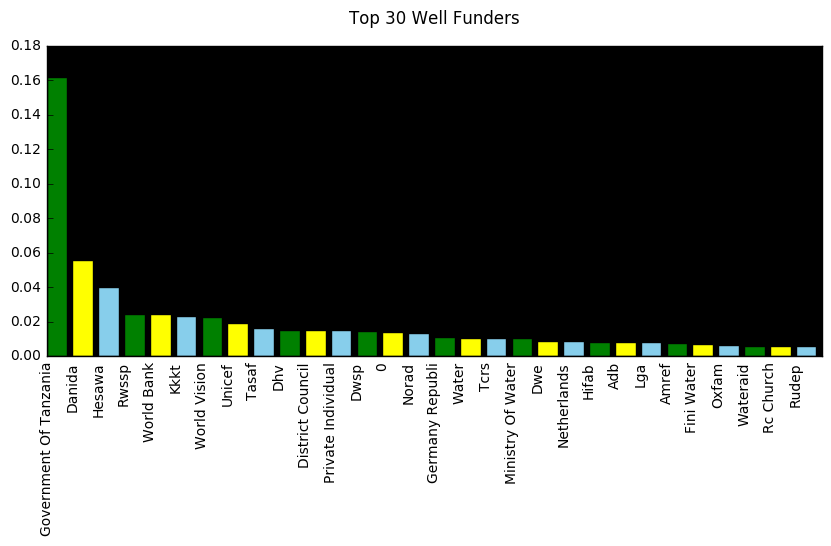

In [134]:
def plot_bar(column, title, figsize, save_path = None):
    funder_list = data[column].value_counts(normalize = True)[:30]
    funder_names_list = funder_list.index
    fig, ax = plt.subplots(figsize = figsize)
    ttl = ax.title
    ttl.set_position([.5, 1.05])
    ax.set_axis_bgcolor('black')
    colors = ['green', 'yellow', 'skyblue']
    plt.bar(np.arange(len(funder_list)), funder_list, color = colors)
    plt.xticks(range(len(funder_names_list)), funder_names_list, rotation = 90)
    plt.title(title)
    if save_path:
        plt.savefig(save_path)
    plt.show()
    
plot_bar(column = 'funder', title = 'Top 30 Well Funders', figsize = (10, 4), save_path = '../reports/images/top_30_well_funders')

Although the government of Tanzania is the most frequent well funder, other organizations fund approximately 75% of the total number of wells.  We could assign the missing values in this column to an `other` group.  

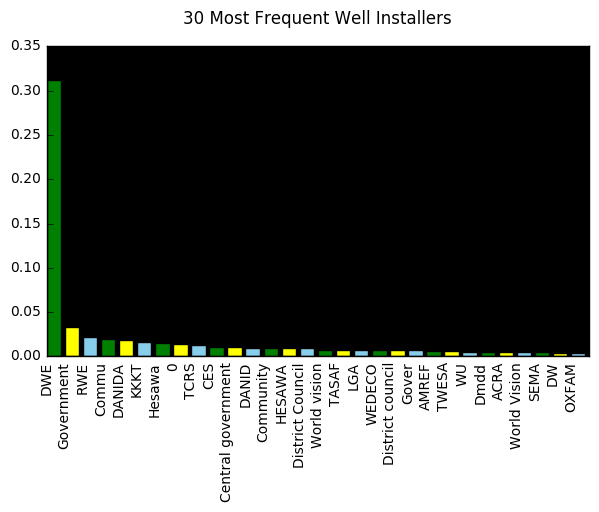

In [145]:
plot_bar(column = 'installer', title = '30 Most Frequent Well Installers', figsize = (7, 4), save_path = '../reports/images/top_30_well_installers')

Since DWE accounts for approximately 30% of wells installed, we can't assume they installed other wells.  We could assign missing values in this column to an `other` category.

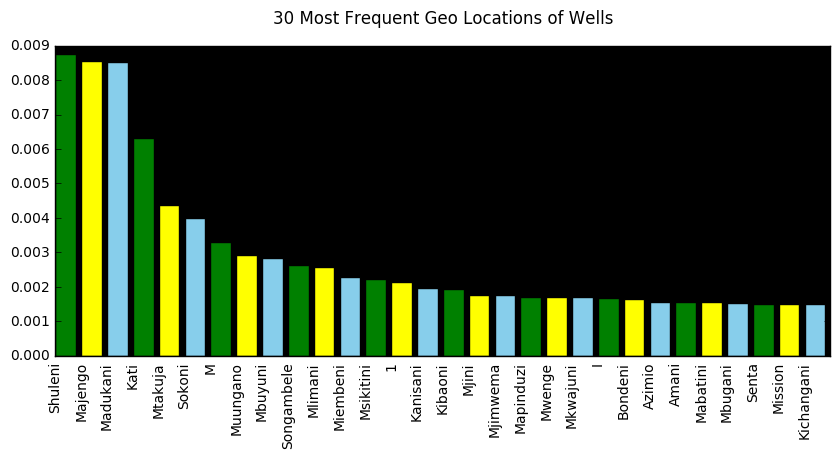

In [136]:
plot_bar(column = 'subvillage', title = '30 Most Frequent Geo Locations of Wells', figsize = (10, 4), save_path = '../reports/images/top_30_geo_locations')

We could assign missing values in this column to an `other` category.  

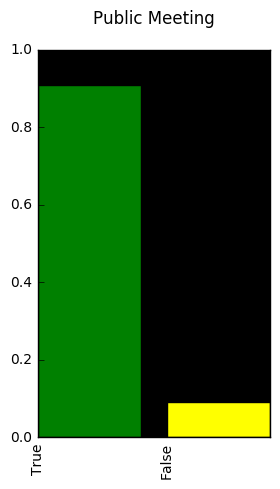

In [143]:
plot_bar(column = 'public_meeting', title = 'Public Meeting', figsize = (3, 5), save_path = '../reports/images/public_meeting')

Most values in this column are labeled as true.  I think it's safe to assign the missing values to this column.  

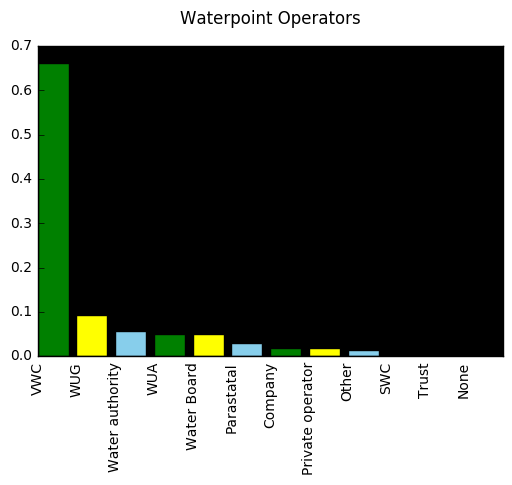

In [144]:
plot_bar(column = 'scheme_management', title = 'Waterpoint Operators', figsize = (6, 4), save_path = '../reports/images/waterpoint_operators')

We could assign the missing values to VWC because they operate most waterpoints.  

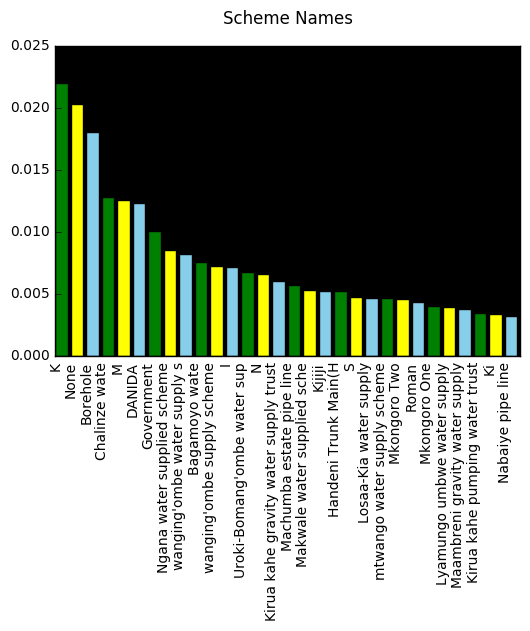

In [146]:
plot_bar(column = 'scheme_name', title = 'Scheme Names', figsize = (6, 4), save_path = '../reports/images/scheme_names')  

We see some odd names, like 'K', 'M', 'I'.  Since I'm not sure how to interpret this, I'll go ahead and assign the missing values to a new group

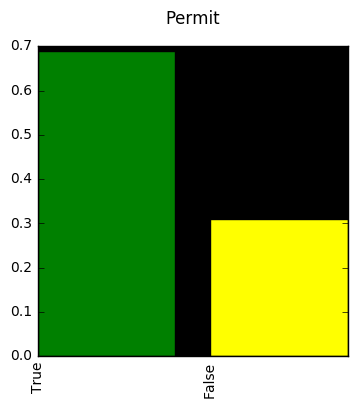

In [151]:
plot_bar(column = 'permit', title = 'Permit', figsize = (4, 4), save_path = '../reports/images/permit')

Since most wells are permitted, let's replace missing values in the `permit` column with `True`